In [1]:
import scipy
import json
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [15]:
def plot_pairs_with_line(pairs, slope, intercept, labels=['x','y'], x_max=None):
    # Extract x and y values from the pairs
    x_values = [pair[0] for pair in pairs]
    y_values = [pair[1] for pair in pairs]

    # Plot the pairs
    plt.scatter(x_values, y_values, label='Pairs')

    # Plot the line with the given slope and y-intercept
    x_min = min(x_values)
    if x_max is None:
        x_max = max(x_values)
    plt.plot([x_min, x_max], [slope * x_min + intercept, slope * x_max + intercept], color='red', label='Line')

    # Add labels and legend
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    
    # set both axes to log scale
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.gca().yaxis.set_major_locator(ticker.LogLocator(base=10))
    #plt.gca().xaxis.set_major_locator(ticker.LogLocator(base=10))
    #plt.legend()

    # Show the plot
    plt.show()

In [3]:
isoflop_data = json.load(open("/home/c-jjian/assignments/spring2024-assignment3-scaling/data/isoflops_curves.json"))

# sort isoflop data by compute_budget 

isoflop_dict = {}
for entry in isoflop_data:
    compute_budget = entry["compute_budget"]
    if compute_budget not in isoflop_dict:
        isoflop_dict[compute_budget] = []
    isoflop_dict[compute_budget].append((entry['final_loss'], entry['parameters']))

# get the best model for each compute budget by returning pairs of compute_budget, parameters

best_models = []
for compute_budget, entries in isoflop_dict.items():
    best_model = min(entries, key=lambda x: x[0])
    best_models.append((compute_budget, best_model[1]))

In [4]:
def fit_power_law(model_list):
    fn = lambda x, a, b: a * x + b
    return scipy.optimize.curve_fit(fn, [x[0] for x in model_list], [x[1] for x in model_list])

In [14]:
best_models

[(6e+18, 762093419),
 (1e+19, 806647749),
 (3e+19, 1536852354),
 (6e+19, 1952041776),
 (1e+20, 3253402960),
 (3e+20, 5903836027),
 (6e+20, 6971055968),
 (1e+21, 6859328563),
 (3e+21, 12148905329)]

In [5]:
best_models_logged = [(math.log(x[0]), math.log(x[1])) for x in best_models]
fit, _ = fit_power_law(best_models_logged)

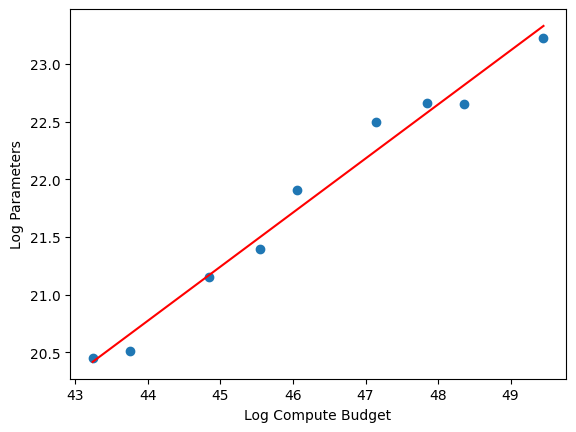

In [16]:
plot_pairs_with_line(best_models_logged, fit[0], fit[1], labels=['Log Compute Budget', 'Log Parameters'])

In [7]:
print("10e23")
model_size = "{:2e}".format(np.power(10e23, fit[0]) + fit[1])
print(f"Model Size: {model_size}")
print("10e24")
model_size = "{:2e}".format(np.power(10e24, fit[0]) + fit[1])
print(f"Model Size: {model_size}")


10e23
Model Size: 1.771675e+11
10e24
Model Size: 5.212748e+11


In [8]:
print("10e18")
model_size = "{:2e}".format(np.power(10e12, fit[0]) + fit[1])
print(f"Model Size: {model_size}")


10e18
Model Size: 1.238439e+06


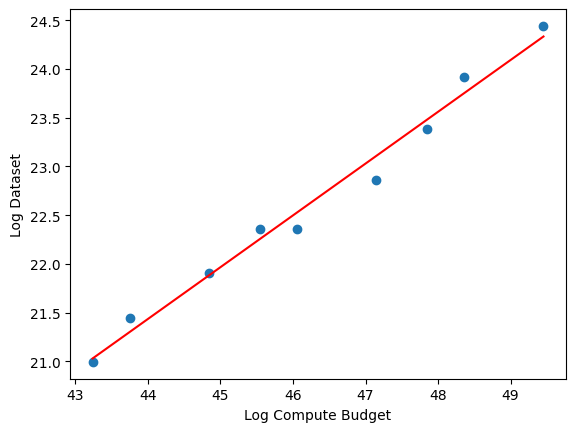

10e23
Dataset Size: 5.644382e+12
10e24
Dataset Size: 1.918376e+13


In [17]:
best_models_dataset = [(math.log(compute_budget), math.log(compute_budget / (6 * parameters))) for compute_budget, parameters in best_models]
dataset_fit, _ = fit_power_law(best_models_dataset)
plot_pairs_with_line(best_models_dataset, dataset_fit[0], dataset_fit[1], labels=['Log Compute Budget', 'Log Dataset'])

print("10e23")
dataset_size = "{:2e}".format(np.power(10e23, dataset_fit[0]) + dataset_fit[1])
print(f"Dataset Size: {dataset_size}")
print("10e24")
dataset_size = "{:2e}".format(np.power(10e24, dataset_fit[0]) + dataset_fit[1])
print(f"Dataset Size: {dataset_size}")


In [21]:
best_dataset = [(compute_budget, compute_budget / (6 * parameters)) for compute_budget, parameters in best_models]
best_dataset

[(6e+18, 1312175089.1277542),
 (1e+19, 2066164157.4439783),
 (3e+19, 3253402961.5703735),
 (6e+19, 5122841182.472726),
 (1e+20, 5122841182.472726),
 (3e+20, 8469069901.558091),
 (6e+20, 14345028996.903902),
 (1e+21, 24297810658.27429),
 (3e+21, 41155971378.46459)]